In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/t20i-cricket-score-prediction/t20I_cricket_dataset.csv


In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


In [3]:
#import data
df=pd.read_csv('/kaggle/input/t20i-cricket-score-prediction/t20I_cricket_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,10400,0,138.162791,New Zealand,Pakistan,Dubai,63,56,5.894737,8,24.0,2.0,144,1
1,163545,0,103.000000,Zimbabwe,Sri Lanka,Hambantota,40,76,5.700000,5,30.0,2.0,100,2
2,1557,0,154.000000,West Indies,Australia,St Lucia,53,68,6.089552,5,27.0,3.0,105,1
3,94589,0,146.285714,Australia,India,Bengaluru,18,159,9.352941,7,50.0,0.0,194,2
4,119086,0,135.609756,Sri Lanka,South Africa,Colombo,42,82,6.307692,7,38.0,1.0,135,2


In [5]:
df.shape

(40000, 14)

In [6]:
df.isnull().sum()

Unnamed: 0          0
powerPlay           0
AverageScore        0
battingTeam         0
bowlingTeam         0
city                0
delivery_left       0
score               0
CurrentRunRate      0
wicketsLeft         0
Run_In_Last5        0
Wickets_In_Last5    0
Final_Score         0
innings             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40000 non-null  int64  
 1   powerPlay         40000 non-null  int64  
 2   AverageScore      40000 non-null  float64
 3   battingTeam       40000 non-null  object 
 4   bowlingTeam       40000 non-null  object 
 5   city              40000 non-null  object 
 6   delivery_left     40000 non-null  int64  
 7   score             40000 non-null  int64  
 8   CurrentRunRate    40000 non-null  float64
 9   wicketsLeft       40000 non-null  int64  
 10  Run_In_Last5      40000 non-null  float64
 11  Wickets_In_Last5  40000 non-null  float64
 12  Final_Score       40000 non-null  int64  
 13  innings           40000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 4.3+ MB


In [8]:
df.describe()

,Unnamed: 0,powerPlay,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,87048.914900,0.095825,149.247188,47.588725,91.262300,7.536559,6.644975,37.779900,1.486800,152.537275,1.469675
std,50609.815781,0.294355,17.789853,26.082556,39.958323,1.764056,2.110934,11.314471,1.146302,32.789835,0.499086
min,31.000000,0.000000,57.666667,0.000000,6.000000,1.090909,0.000000,5.000000,0.000000,36.000000,1.000000
25%,42948.250000,0.000000,138.071429,26.000000,59.000000,6.324324,5.000000,30.000000,1.000000,132.000000,1.000000
50%,86745.000000,0.000000,149.000000,48.000000,87.000000,7.436620,7.000000,37.000000,1.000000,151.000000,1.000000
75%,130836.500000,0.000000,160.250000,70.000000,119.000000,8.611765,8.000000,45.000000,2.000000,173.000000,2.000000
max,175280.000000,1.000000,219.000000,98.000000,273.000000,16.451613,10.000000,88.000000,8.000000,278.000000,2.000000


In [9]:
#Unnamed: 0 has no maning so remove it
df.drop('Unnamed: 0',axis=1,inplace=True)

**EDA**

In [10]:
df.duplicated().sum()

24

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.select_dtypes('O').columns

Index(['battingTeam', 'bowlingTeam', 'city'], dtype='object')

# visualizations

Text(0.5, 1.0, 'Number of Bowling Team')

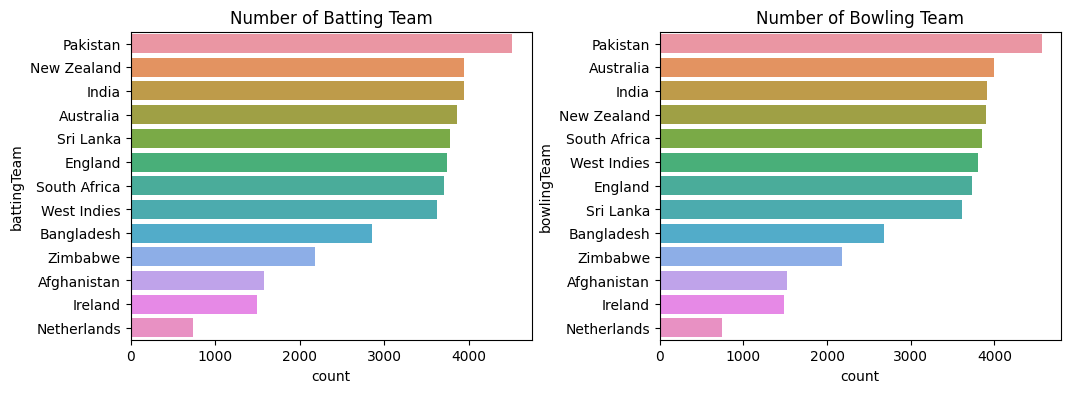

In [13]:
# visualization with Categorical columns

plt.figure(1,figsize=(12,9))
plt.subplots_adjust(wspace=0.32,hspace=.25)

plt.subplot(221)
sns.countplot(data=df,y='battingTeam',order = df['battingTeam'].value_counts().index)
plt.title('Number of Batting Team')

plt.subplot(222)
sns.countplot(data=df,y='bowlingTeam',order = df['bowlingTeam'].value_counts().index)
plt.title('Number of Bowling Team')

**highest number of batting and bowlling teams are from Pakistan**

Text(0.5, 1.0, 'Number of City')

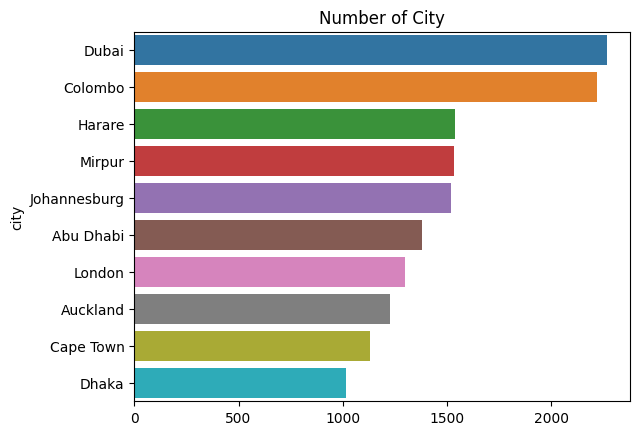

In [14]:

sns.barplot(y = df['city'].value_counts().head(10).index, x = df['city'].value_counts().head(10).values)
plt.title('Number of City')

**Most of the matches played in Dubai and Colombo.**

In [15]:
# visualization with continious columns
df.select_dtypes('int').columns

Index(['powerPlay', 'delivery_left', 'score', 'wicketsLeft', 'Final_Score',
       'innings'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CurrentRunRate'>

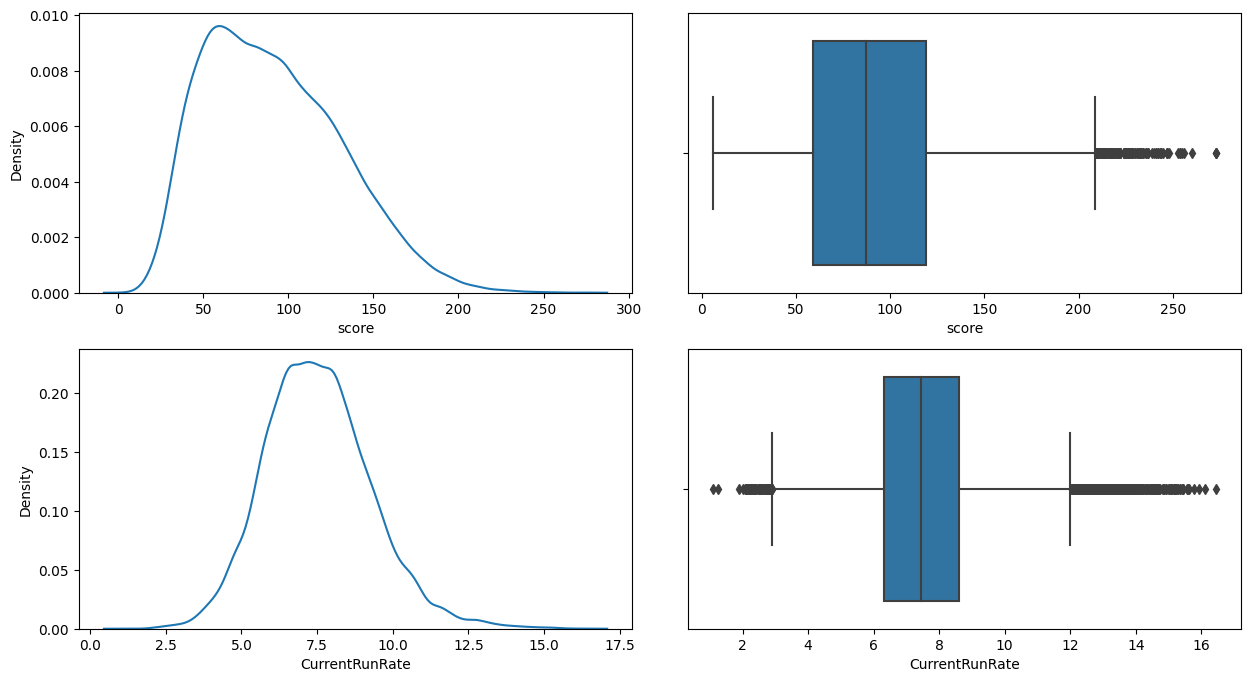

In [16]:
#finding outliers using kde subplots
plt.figure(3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=df, x='score');

plt.subplot(222)
sns.boxplot(data=df,x='score',orient='h')

plt.subplot(223)
sns.kdeplot(data=df, x='CurrentRunRate');

plt.subplot(224)
sns.boxplot(data=df,x='CurrentRunRate',orient='h')


**Scores and Currentraunrate has some outliers.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Run_In_Last5'>

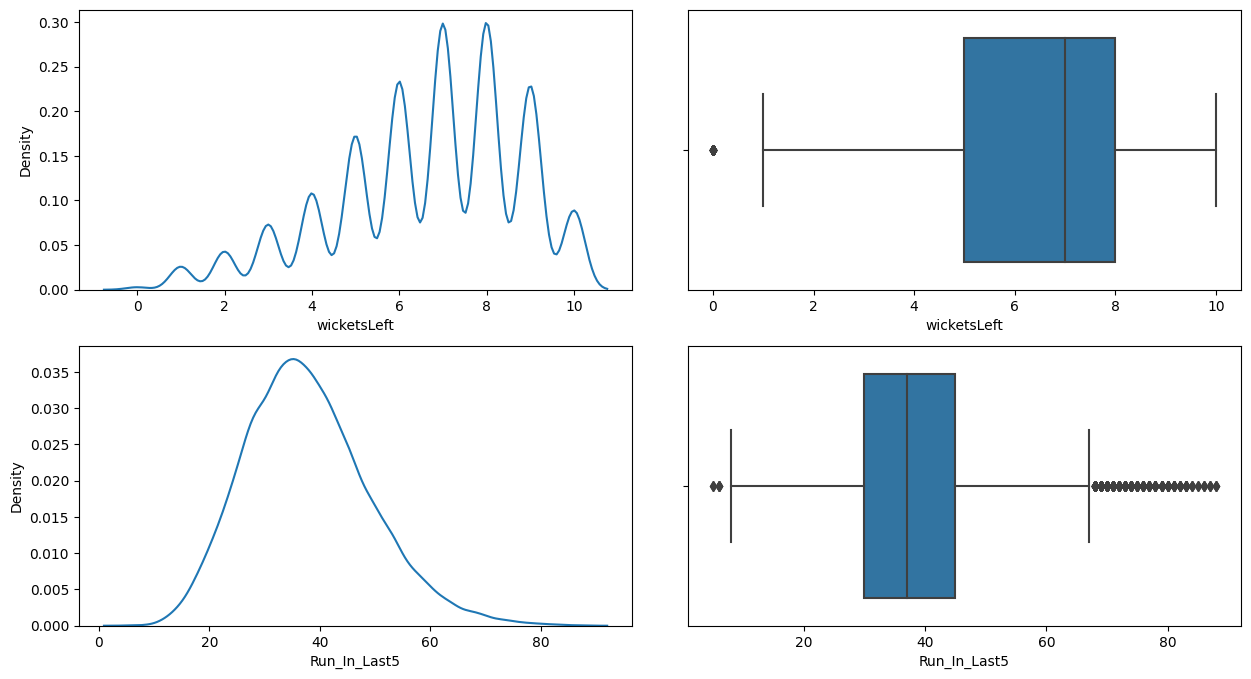

In [17]:
#finding outliers using kde subplots
plt.figure(3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=df, x='wicketsLeft');

plt.subplot(222)
sns.boxplot(data=df,x='wicketsLeft',orient='h')

plt.subplot(223)
sns.kdeplot(data=df, x='Run_In_Last5');

plt.subplot(224)
sns.boxplot(data=df,x='Run_In_Last5',orient='h')

**in above graph it showint Run_in_Last5 has outliers**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='innings'>

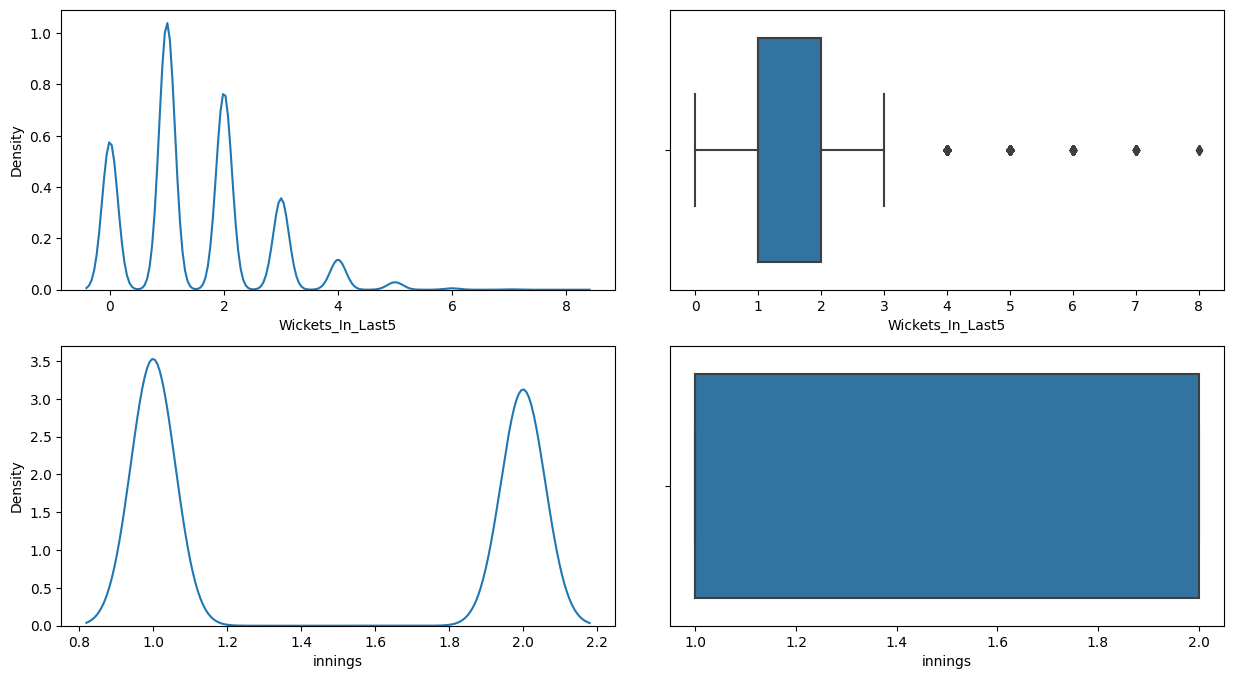

In [18]:
#finding outliers using kde subplots
plt.figure(3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=df, x='Wickets_In_Last5');

plt.subplot(222)
sns.boxplot(data=df,x='Wickets_In_Last5',orient='h')

plt.subplot(223)
sns.kdeplot(data=df, x='innings');

plt.subplot(224)
sns.boxplot(data=df,x='innings',orient='h')

**every team has approximetly 140 average score**

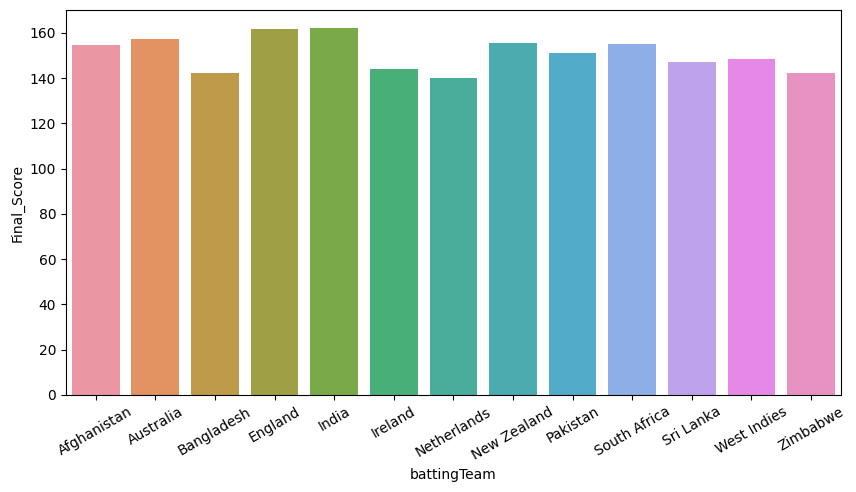

In [19]:
#score scored by batting team (first batting)
f_score_btean=df.groupby('battingTeam').agg({'Final_Score':'mean'})
plt.figure(figsize=(10, 5))
sns.barplot(x = f_score_btean.index, y = f_score_btean['Final_Score'])
plt.xticks(rotation=30)
plt.show()
# f_score_btean


**India and England batting teams has the highest mean(160) of final score.**

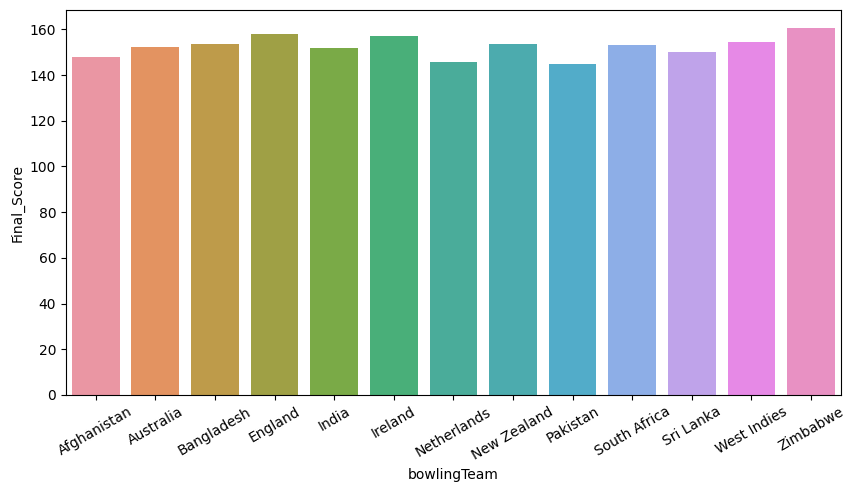

In [20]:
#score scored by bowling team (first bowlers)
f_score_btean=df.groupby('bowlingTeam').agg({'Final_Score':'mean'})
plt.figure(figsize=(10, 5))
sns.barplot(x = f_score_btean.index, y = f_score_btean['Final_Score'])
plt.xticks(rotation=30)
plt.show()


**Zimbabwe bolling teams has the highest mean(160) of final score.**

****

<Axes: xlabel='city'>

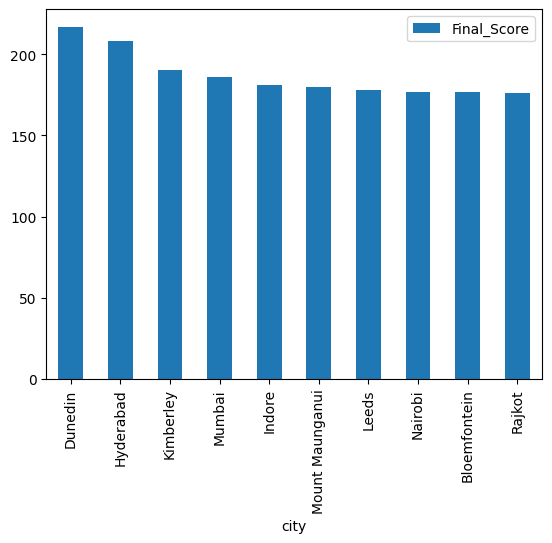

In [21]:
#final score scored by each city played
df.groupby('city').agg({'Final_Score':'mean'}).sort_values('Final_Score',ascending=False).head(10).plot(kind='bar')

**mathes played in Denudin have the highest mean(220) of finalscore**

In [22]:
#trying features combinations
df.groupby(['battingTeam','city']).agg({'Final_Score':'max'})

Final_Score
battingTeam city                   
Afghanistan Abu Dhabi           198
            Barbados             80
            Bready              160
            Bulawayo            191
            Chattogram          155
...                             ...
Zimbabwe    Rawalpindi          156
            Rotterdam           152
            Sharjah             182
            Sylhet              163
            Trinidad            105

[481 rows x 1 columns]

In [23]:
#corelation between numerical column
metric=df.loc[:,['AverageScore', 'delivery_left', 'score', 'CurrentRunRate',
       'wicketsLeft', 'Run_In_Last5', 'Wickets_In_Last5', 'Final_Score',
       'innings']].corr()

<Axes: >

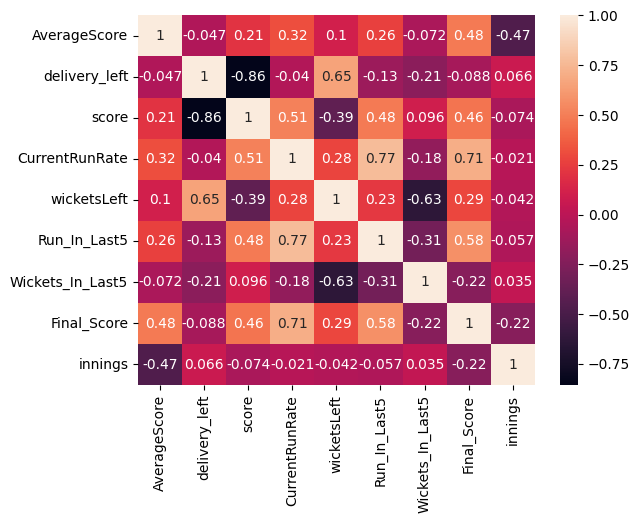

In [24]:
sns.heatmap(metric,annot=True)

# Outlier Handeling

**average score,current_runrate, score,runin_last5 has mostly outliers**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

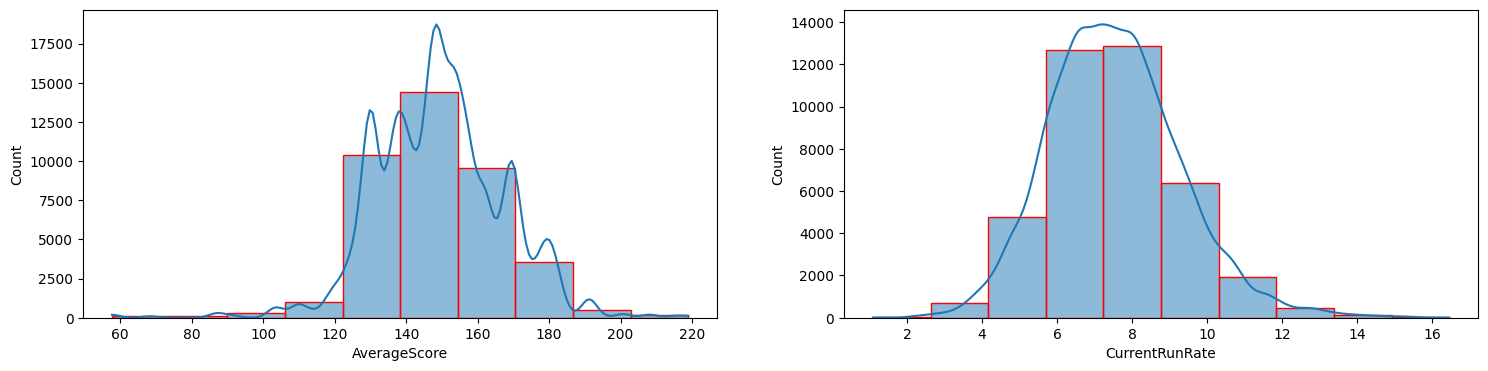

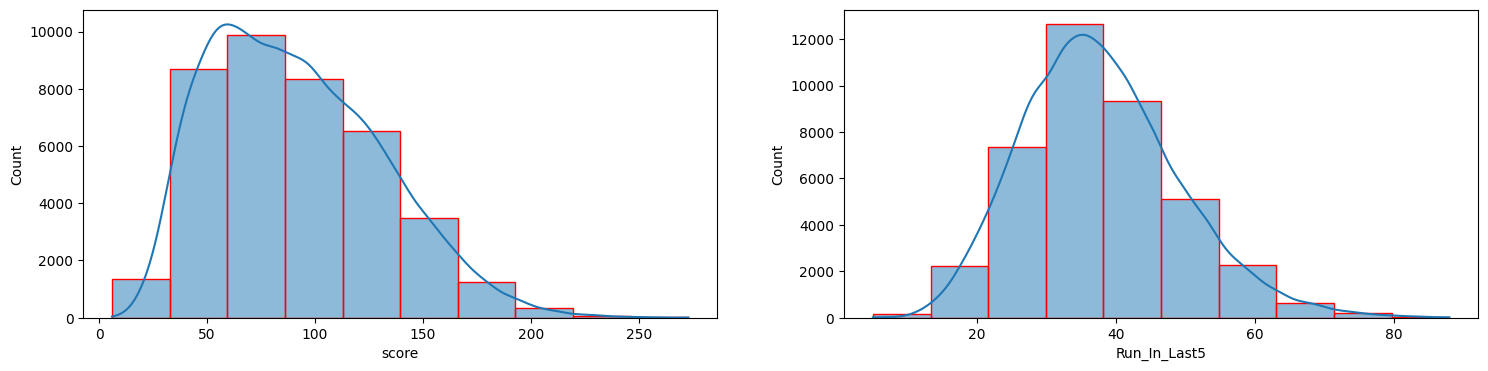

In [25]:
#outlier visualisation
plt.figure(10, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=df, x='AverageScore', ax=plt.subplot(121),bins=10, kde=True, edgecolor='red');
sns.histplot(data=df, x='CurrentRunRate', ax=plt.subplot(122),bins=10, kde=True, edgecolor='red');

plt.figure(11, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=df, x='score', ax=plt.subplot(121),bins=10, kde=True, edgecolor='red');
sns.histplot(data=df, x='Run_In_Last5', ax=plt.subplot(122),bins=10, kde=True, edgecolor='red');
plt.show()


In [26]:
# remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to all columns
for col in df.select_dtypes(include=['float', 'int']):
    df = remove_outliers_iqr(df, col)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AverageScore'>

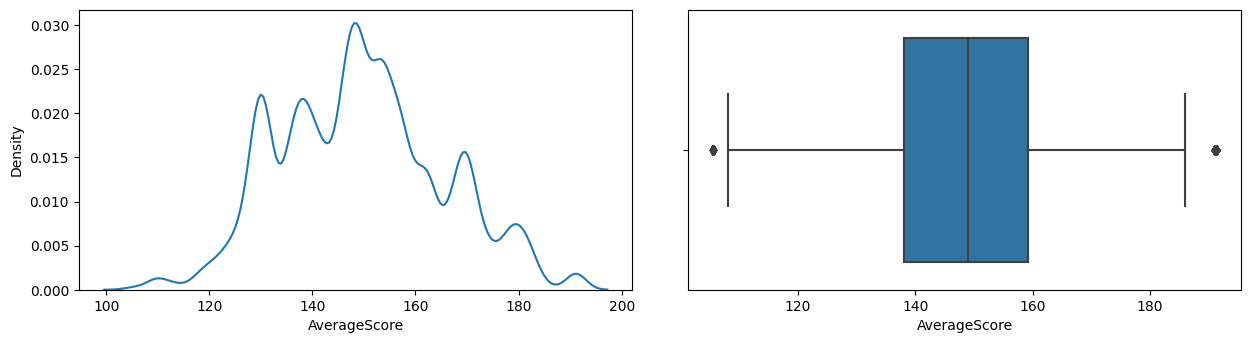

In [27]:
plt.figure(3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=df, x='AverageScore');

plt.subplot(222)
sns.boxplot(data=df,x='AverageScore',orient='h')

**now,we can see there is no outliers in AverageScore.**

In [28]:
obj_col=df.select_dtypes(include='object').columns
obj_col

Index(['battingTeam', 'bowlingTeam', 'city'], dtype='object')

In [29]:
# from sklearn.preprocessing import OneHotEncoder

# for col in obj_col:
#   ohe=OneHotEncoder()
#   df[col]=ohe.fit_transform(df[col])

In [30]:
from sklearn.preprocessing import LabelEncoder

for col in obj_col:
  lb=LabelEncoder()
  df[col]=lb.fit_transform(df[col])

In [31]:
df.head()

,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,0,138.162791,7,8,35,63,56,5.894737,8,24.0,2.0,144,1
2,0,154.000000,11,1,87,53,68,6.089552,5,27.0,3.0,105,1
3,0,146.285714,1,4,9,18,159,9.352941,7,50.0,0.0,194,2
4,0,135.609756,10,9,26,42,82,6.307692,7,38.0,1.0,135,2
5,0,153.142857,9,10,26,65,70,7.636364,10,39.0,0.0,163,1


In [32]:
# Extract indipendent and dependent Feature
x=df.drop('Final_Score',axis=1)
y=df.iloc[:,-2]

In [33]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
print(f"X_train shape: {x_train.shape},X_test shape:{x_test.shape}")

X_train shape: (25805, 12),X_test shape:(6452, 12)


# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=lr.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r1=r2_score(y_test,y_pred)

print('MSE : ',mse,'r2_score : ',r1)

MSE :  301.2059453493316 r2_score :  0.6224769835857524


In [38]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.6271863160956452, 0.6224769835857524)

# RandomForest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
y_pred=rgr.predict(x_test)

In [41]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE : ',mse,'r2_score : ',r2)

MSE :  70.32019545079045 r2_score :  0.9118626550660124


In [42]:
rgr.score(x_train,y_train),rgr.score(x_test,y_test)

(0.987687260911682, 0.9118626550660124)

# SVR

In [43]:
from sklearn.svm import SVR
model_svr=SVR()
model_svr.fit(x_train,y_train)

SVR()

In [44]:
y_pred=model_svr.predict(x_test)

In [45]:
mse=mean_squared_error(y_test,y_pred)
r3=r2_score(y_test,y_pred)
print('MSE : ',mse,'r2_score : ',r3)

MSE :  312.7309780464576 r2_score :  0.6080318334309449


# XGBoost

In [46]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred=model_xgb.predict(x_test)

In [48]:
mse=mean_squared_error(y_test,y_pred)
r4=r2_score(y_test,y_pred)
print('MSE : ',mse,'r2_score : ',r4)

MSE :  104.52641952558209 r2_score :  0.8689895408654276


In [49]:
model_xgb.score(x_train,y_train),model_xgb.score(x_test,y_test)

(0.9146926461405506, 0.8689895408654276)

In [50]:
score=[r1,r2,r3,r4]
model=['LinearRegression','RandomForestRegression','SVR','XGBoost']



data_f=pd.DataFrame({'score':score,'model':model})
data_f

,score,model
0,0.622477,LinearRegression
1,0.911863,RandomForestRegression
2,0.608032,SVR
3,0.868990,XGBoost


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


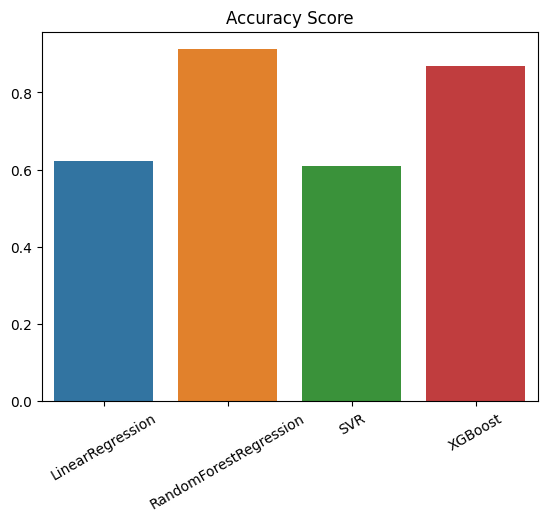

In [51]:
sns.barplot(data=data_f,x=model,y=score)
plt.xticks(rotation=30)
plt.title('Accuracy Score')
plt.show()

**RandomForest and XGBoost performing good with accuracy score 0.86 and 0.91.**